In [27]:
import pandas as pd
data = pd.read_csv("../data/pima-indians-diabetes.txt", header=None)
data.columns = ["pregnant", "plasma_glucose", "blood_pressure", "triceps_skin_thickness", "insulin", "bmi", "diabetes_pedigree_function", "age", "class"]

<AxesSubplot:>

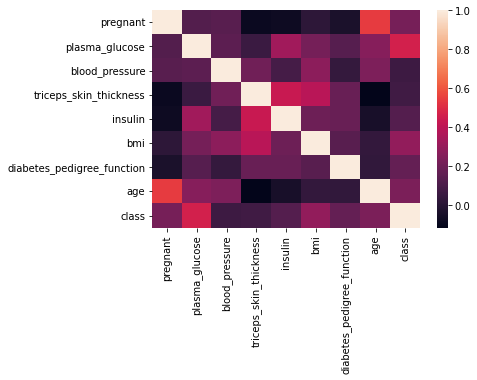

In [28]:
corr = data.corr()
# visualize correlation matrix
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [29]:
# split the data in train and test sets
from sklearn.model_selection import train_test_split
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
# print number of values in class variable
print(y_train.value_counts())

0    393
1    221
Name: class, dtype: int64


In [33]:
# Oversample the 1 class in train data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [34]:
# train an XGBoost Classifier from sklearn with 20 iterations and 0.1 learning rate
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=20, silent=True, objective='binary:logistic')
clf.fit(X_train_res, y_train_res)

[11:37:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
for i in range(len(clf.feature_importances_)):
    print(X.columns[i], clf.feature_importances_[i])

pregnant 0.040252846
plasma_glucose 0.34201467
blood_pressure 0.044803347
triceps_skin_thickness 0.06807152
insulin 0.075394966
bmi 0.18665685
diabetes_pedigree_function 0.09070613
age 0.15209967


In [36]:
from sklearn.metrics import accuracy_score, recall_score
recall = recall_score(y_test, clf.predict(X_test))
accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Recall: ", recall)
print("Accuracy: ", accuracy)

Recall:  0.8085106382978723
Accuracy:  0.7857142857142857
